<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

##Import the file

In [1]:
# get zip file from online
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-02 16:04:22--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [  <=>               ]  21.66M   406KB/s    in 55s     

2019-11-02 16:05:18 (401 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22709125]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv
# Needs to skip a line when loading

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [4]:
!tail LoanStats_2018Q4.csv
# Need to skip last two lines when loading

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","3978.52","3978.52","2271.97","2271.97","1621.48","650.49","0.0","0.0","0.0","Oct-2019","190.21","Nov-2019","Oct-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [8]:
# load file to a df
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine= 'python')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# what is the shape of the file
print(df.shape)
print(df.columns)

(128412, 144)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [11]:
# Check for missing data
pd.options.display.max_rows=999
pd.options.display.max_columns=100

df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128283
hardship_type                                 128276
hardship_last_payment_amount                  128276
hardship_payoff_balance_amount                128276
hardship_reason                               128276
hardship_loan_status                          128276
hardship_dpd                                  128276
hardship_length                               128276
payment_plan_start_date                       128276
hardship_end_date                             128276
hardship_start_date                           128276
hardship_amount                               128276
deferral_term                                 128276
hardship_status                               128276
settlement_percentage                         

##Convert int_rate

In [12]:
# Conver int_rate from a string to a number
df['int_rate'].head()

0     14.47%
1     22.35%
2     23.40%
3     18.94%
4     10.72%
Name: int_rate, dtype: object

In [13]:
df['int_rate'].dtype

dtype('O')

In [14]:
# check value in first cell
int_rate0=df.loc[0, 'int_rate']
print(int_rate0)
int_rate0

 14.47%


' 14.47%'

In [15]:
# test the strip on our sample item
int_rate0.strip().strip('%')

'14.47'

In [16]:
# now convert it to a float
float(int_rate0.strip().strip('%'))

14.47

In [0]:
# now we convert the whole column
# First making a function to do that
def int_rate_2_float(mystring):
  return(float(mystring.strip().strip('%')))

In [20]:
# test the function
int_rate_2_float(int_rate0)

14.47

In [21]:
# apply the function to the whole column
df['int_rate_float'] = df['int_rate'].apply(int_rate_2_float)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float'],
      dtype='object', length=145)

In [22]:
# check to see it worked
df['int_rate_float'].head()

0    14.47
1    22.35
2    23.40
3    18.94
4    10.72
Name: int_rate_float, dtype: float64

In [23]:
df['int_rate_float'].dtype
# It worked

dtype('float64')

## Convert term

In [41]:
#Look at a sample
df['term'].sample(5)

28438      36 months
21297      60 months
81057      36 months
112882     36 months
26753      36 months
Name: term, dtype: object

In [42]:
# check for nulls
df['term'].isnull().sum()
# nothing so we are good

0

In [45]:
# find code on an exapmle
term0 = df.loc[0, 'term']
term0

' 36 months'

In [46]:
term0.strip('months').strip()

'36'

In [0]:
# make a function to strip it
def clean_term(term):
  return int(term.strip('months').strip())
  

In [54]:
# test it
clean_term(term0)

36

In [55]:
df['term_clean'] = df['term'].apply(clean_term)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'emp_title_clean', 'term_clean'],
      dtype='object', length=147)

In [57]:
df[['term', 'term_clean']].sample(5)

,term,term_clean
6913,60 months,60
44002,36 months,36
92723,36 months,36
46750,36 months,36
26204,36 months,36


In [59]:
df['term_clean'].dtype
# it worked

dtype('int64')

##Clean emp_title

In [26]:
# check samples
df[['emp_title']].sample(5)

,emp_title
75840,Sr. Manager
119568,Receptionist
23836,Mgr
66160,NaN
63887,Service Tech


In [27]:
# See how my different titles there are
df['emp_title'].nunique()

43892

In [28]:
#show the most popular titles
df['emp_title'].value_counts(ascending=False, dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [29]:
# How many are null
df['emp_title'].isnull().sum()

20947

In [31]:
# We will have to clean up the null values
import numpy as np

# Make a funtion to replace nulls with an Unknown
#   and cleans up the titles to look cleaner
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'

#test it out
examples = ['cook', 'supervisor', 'Project manaGEr', np.NaN]

for item in examples:
  print(clean_title(item))


Cook
Supervisor
Project Manager
Unknown


In [32]:
# now we apply it
df['emp_title_clean'] = df['emp_title'].apply(clean_title)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_float', 'emp_title_clean'],
      dtype='object', length=146)

In [35]:
# Check our work
df[['emp_title', 'emp_title_clean']].sample(6)

,emp_title,emp_title_clean
83590,Helper bindery,Helper Bindery
65393,Teacher,Teacher
64717,NaN,Unknown
399,Social Studies Teacher,Social Studies Teacher
85491,NaN,Unknown
91593,Truck Driver,Truck Driver


In [37]:
df['emp_title_clean'].isnull().sum()
# it worked

0

##Create emp_title_manager

In [60]:
#create a new column to see if the title is a manager
df['emp_title_manager'] = df['emp_title_clean'].str.contains('Manager')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_float', 'emp_title_clean', 'term_clean', 'emp_title_manager'],
      dtype='object', length=148)

In [62]:
# compare
df[['emp_title_clean', 'emp_title_manager']].sample(5)

,emp_title_clean,emp_title_manager
22586,Vendor Manager,True
29633,Manager,True
76585,Guest Service,False
62284,Unknown,False
101435,Bookkeeper,False


In [63]:
# Check for null (there shouldn't be any)
df['emp_title_manager'].isnull().sum()

0

In [0]:
# It worked and now we can do things with this if we want to

###Filtering

In [141]:
# emp_title_manager is booloeans so we can use it as a filter
condition = df['emp_title_manager'] == True

managers = df[condition]
managers.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_clean,term_clean,emp_title_manager,loan_status_is_great,issue_d_clean,issue_year,issue_month,issue_weekday,last_pymnt_d_clean,last_pymnt_d_year,last_pymnt_d_month
9,NaN,NaN,10450,10450,10450.0,36 months,18.94%,382.74,D,D2,Project Manager,10+ years,MORTGAGE,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,371xx,TN,27.38,0,Jul-2007,0,NaN,NaN,11,0,34628,87%,24,w,8361.33,8361.33,3439.170000,3439.17,2088.67,1350.50,0.0,0.0,0.0,Oct-2019,382.74,Nov-2019,Oct-2019,0,...,0,429450,41288,11800,17500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,Project Manager,36,True,1,2018-12-01,2018,12,5,2019-10-01,2019.0,10.0
11,NaN,NaN,15400,15400,15400.0,60 months,14.47%,362.10,C,C2,DISTRICT SALES MANAGER,3 years,MORTGAGE,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,451xx,OH,36.55,2,Sep-1991,0,10.0,NaN,14,0,7336,22.2%,26,w,13537.12,13537.12,3602.430000,3602.43,1862.88,1739.55,0.0,0.0,0.0,Oct-2019,362.10,Nov-2019,Oct-2019,0,...,0,654296,144449,20000,177320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,District Sales Manager,60,True,1,2018-12-01,2018,12,5,2019-10-01,2019.0,10.0
27,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,Production Manager,60,True,1,2018-12-01,2018,12,5,2019-04-01,2019.0,4.0
40,NaN,NaN,12000,12000,12000.0,36 months,16.14%,422.72,C,C4,Sales Account Manager,4 years,RENT,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,18.96,0,Nov-2013,0,NaN,NaN,6,0,13663,61.8%,7,w,9555.15,9555.15,3788.340000,3788.34,2444.85,1343.49,0.0,0.0,0.0,Oct-2019,422.72,Nov-2019,Oct-2019,0,...,0,56264,34470,18500,34164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,Sales Account Manager,36,True,1,2018-12-01,2018,12,5,2019-10-01,2019.0,10.0
42,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Ri

In [152]:
# using two filters at once
subordinates=df[(df['emp_title_manager']==False) & (df['home_ownership']=='OWN')]
subordinates.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_clean,term_clean,emp_title_manager,loan_status_is_great,issue_d_clean,issue_year,issue_month,issue_weekday,last_pymnt_d_clean,last_pymnt_d_year,last_pymnt_d_month
24,NaN,NaN,30000,30000,30000.0,60 months,26.31%,903.73,E,E4,Casino Host,10+ years,OWN,62000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,37.24,0,Oct-2007,0,NaN,86.0,15,1,18890,39.8%,36,w,0.00,0.00,2645.41,2645.41,754.24,1891.17,0.0,0.0,0.0,Apr-2019,903.73,NaN,Oct-2019,0,...,0,138354,104590,36400,90854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,26.31,Casino Host,60,False,0,2018-12-01,2018,12,5,2019-04-01,2019.0,4.0
41,NaN,NaN,1200,1200,1200.0,36 months,17.97%,43.37,D,D1,Haz Mat S/R,10+ years,OWN,52000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,605xx,IL,25.61,0,Feb-1991,2,NaN,NaN,14,0,18197,48.3%,24,w,928.18,928.18,431.90,431.90,271.82,160.08,0.0,0.0,0.0,Oct-2019,43.37,Nov-2019,Oct-2019,0,...,0,50041,29964,15700,12341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,Haz Mat S/R,36,False,1,2018-12-01,2018,12,5,2019-10-01,2019.0,10.0
47,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15280.46,15280.46,6792.87,6792.87,4719.54,2073.33,0.0,0.0,0.0,Oct-2019,688.13,Nov-2019,Oct-2019,0,...,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,Bus Driver,36,False,1,2018-12-01,2018,12,5,2019-10-01,2019.0,10.0
49,NaN,NaN,21000,21000,21000.0,36 months,16.91%,747.77,C,C5,NaN,< 1 year,OWN,68000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,house,Home buying,347xx,FL,9.16,0,Aug-2000,0,35.0,NaN,6,0,890,19.8%,14,w,18194.08,18194.08,4457.03,4457.03,2805.92,1651.11,0.0,0.0,0.0,Jul-2019,747.77,Nov-2019,Oct-2019,0,...,0,43057,31650,4500,38557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.91,Unknown,36,False,0,2018-12-01,2018,12,5,2019-07-01,2019.0,7.0
65,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,219

In [153]:
# Can compare managers to subordinates
print(managers['int_rate_float'].mean())
print(subordinates['int_rate_float'].mean())

12.759972038921248
13.195756289056202


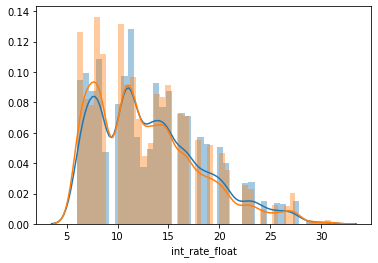

In [154]:
# We can even visualize it
import seaborn as sns
sns.distplot(subordinates['int_rate_float'])
sns.distplot(managers['int_rate_float']);

##Create loan_status_is_great

In [68]:
# check out loan_status column
df['loan_status'].sample(15)

31230         Current
121540     Fully Paid
104388        Current
9459          Current
79513      Fully Paid
71149      Fully Paid
24346         Current
44980      Fully Paid
115587        Current
37816     Charged Off
109248        Current
14357      Fully Paid
19256      Fully Paid
15065         Current
84443         Current
Name: loan_status, dtype: object

In [70]:
# check for nulls
df['loan_status'].isnull().sum()
# great, no nulls

0

In [0]:
# create a function
def loan_status_filter(status):
  if status == 'Current' or status == "Fully Paid":
    return 1
  else:
    return 0

In [99]:
# test it

examples2 = ['Current', 'fail', 'bad', 'Fully Paid']

for item in examples2:
  print(loan_status_filter(item))


1
0
0
1


In [100]:
# Apply it to the df
df['loan_status_is_great'] = df['loan_status'].apply(loan_status_filter)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'emp_title_clean', 'term_clean', 'emp_title_manager',
       'loan_status_is_great'],
      dtype='object', length=149)

In [104]:
# Check our work
df[['loan_status', 'loan_status_is_great']].sample(10)

,loan_status,loan_status_is_great
3544,Current,1
62037,Fully Paid,1
29088,Current,1
48588,Fully Paid,1
122905,Charged Off,0
428,Current,1
48334,Current,1
38372,Charged Off,0
93168,Current,1
21921,Fully Paid,1


In [0]:
# It worked and now it is available to use.

##Work with Dates

In [0]:
# list all col and data types
df.dtypes

In [106]:
# Which col are dates?
for col in df.columns:
  if col.endswith('_date') or col.endswith('_d'):
    print(col)

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d
hardship_start_date
hardship_end_date
payment_plan_start_date
debt_settlement_flag_date
settlement_date


In [108]:
# put them all in a variable
date_col_list = [col for col in df.columns if col.endswith('_date') or col.endswith('_d')]
print(date_col_list)

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [109]:
# check the data type
df['issue_d'].dtype

dtype('O')

In [110]:
df.loc[0:10, 'issue_d']

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
Name: issue_d, dtype: object

In [111]:
# convert the string to dates
df['issue_d_clean'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

# compare
df[['issue_d', 'issue_d_clean']].head()

,issue_d,issue_d_clean
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [112]:
# check the type
df['issue_d_clean'].dtype

dtype('<M8[ns]')

In [115]:
# make a year column
df['issue_year'] = df['issue_d_clean'].dt.year

#check
df[['issue_d_clean', 'issue_year']].sample(5)

,issue_d_clean,issue_year
29020,2018-12-01,2018
32266,2018-12-01,2018
1058,2018-12-01,2018
14532,2018-12-01,2018
40709,2018-11-01,2018


In [116]:
# a month
df['issue_month'] = df['issue_d_clean'].dt.month

#check
df[['issue_d_clean', 'issue_month']].sample(5)

,issue_d_clean,issue_month
103094,2018-10-01,10
74310,2018-11-01,11
50547,2018-11-01,11
103797,2018-10-01,10
121321,2018-10-01,10


In [117]:
# and a weekday
df['issue_weekday'] = df['issue_d_clean'].dt.weekday

#check
df[['issue_d_clean', 'issue_weekday']].sample(5)

,issue_d_clean,issue_weekday
95073,2018-10-01,0
49550,2018-11-01,3
33507,2018-12-01,5
50345,2018-11-01,3
100737,2018-10-01,0


##Create last_pymnt_d_month and last_pymnt_d_year columns

In [129]:
# Take a look at the data
df['last_pymnt_d'].sample(5)

29206     Oct-2019
16760     Oct-2019
20457     Dec-2018
121169    Jul-2019
10882     Oct-2019
Name: last_pymnt_d, dtype: object

In [119]:
# any nulls?
df['last_pymnt_d'].isnull().sum()

159

In [131]:
# Convert the column to date
df['last_pymnt_d_clean'] = pd.to_datetime(df['last_pymnt_d'], 
                                          infer_datetime_format=True)

# Compare
df[['last_pymnt_d', 'last_pymnt_d_clean']].sample(6)

,last_pymnt_d,last_pymnt_d_clean
34775,Oct-2019,2019-10-01
54460,Oct-2019,2019-10-01
86377,Oct-2019,2019-10-01
68203,Oct-2019,2019-10-01
78172,Oct-2019,2019-10-01
21681,Oct-2019,2019-10-01


In [134]:
# I think leaving the nulls makes sense at this point
df['last_pymnt_d_clean'].isnull().sum()

159

In [135]:
# check data type
df['last_pymnt_d_clean'].dtype

dtype('<M8[ns]')

In [137]:
# Creat a year column
df['last_pymnt_d_year'] = df['last_pymnt_d_clean'].dt.year

# Compair
df[['last_pymnt_d_clean', 'last_pymnt_d_year']].sample(5)

,last_pymnt_d_clean,last_pymnt_d_year
12625,2019-10-01,2019.0
113337,2019-10-01,2019.0
18342,2019-10-01,2019.0
113186,2019-04-01,2019.0
125487,2019-10-01,2019.0


In [140]:
# just looking to see possible years
df['last_pymnt_d_year'].nunique()

2

In [138]:
# Creat a month column
df['last_pymnt_d_month'] = df['last_pymnt_d_clean'].dt.month

# Compair
df[['last_pymnt_d_clean', 'last_pymnt_d_month']].sample(5)

,last_pymnt_d_clean,last_pymnt_d_month
55963,2019-10-01,10.0
119023,2019-07-01,7.0
124038,2019-09-01,9.0
62502,2019-10-01,10.0
8510,2019-10-01,10.0


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

##Lending Club Options

###Convert last percent to float

In [156]:
df.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_clean,term_clean,emp_title_manager,loan_status_is_great,issue_d_clean,issue_year,issue_month,issue_weekday,last_pymnt_d_clean,last_pymnt_d_year,last_pymnt_d_month
4422,NaN,NaN,35000,35000,35000.0,60 months,14.47%,822.95,C,C2,Science Teacher,10+ years,OWN,105000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,074xx,NJ,14.37,0,Mar-2002,0,57.0,NaN,12,0,46752,77.8%,21,w,30766.23,30766.23,8173.23,8173.23,4233.77,3939.46,0.00,0.0,0.0,Oct-2019,822.95,Nov-2019,Oct-2019,0,...,0,372100,46752,48500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,Science Teacher,60,False,1,2018-12-01,2018,12,5,2019-10-01,2019.0,10.0
54022,NaN,NaN,25000,25000,24975.0,36 months,8.19%,785.61,A,A4,Sr Content Mgr,6 years,OWN,98000.0,Not Verified,Nov-2018,Current,n,NaN,NaN,other,Other,660xx,KS,24.33,0,May-1992,1,NaN,NaN,17,0,5314,6.5%,54,f,17999.52,17981.52,8624.65,8616.03,7000.48,1624.17,0.00,0.0,0.0,Oct-2019,785.61,Nov-2019,Oct-2019,0,...,0,209841,77765,66300,127541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.19,Sr Content Mgr,36,False,1,2018-11-01,2018,11,3,2019-10-01,2019.0,10.0
122394,NaN,NaN,12000,12000,12000.0,36 months,10.08%,387.66,B,B1,NaN,< 1 year,RENT,48000.0,Source Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,216xx,MD,9.13,1,Apr-2001,0,22.0,NaN,7,0,4573,45.3%,21,w,8394.11,8394.11,4645.20,4645.20,3605.89,1039.31,0.00,0.0,0.0,Oct-2019,387.66,Nov-2019,Oct-2019,0,...,0,25396,11745,4700,15296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.08,Unknown,36,False,1,2018-10-01,2018,10,0,2019-10-01,2019.0,10.0
59381,NaN,NaN,19000,19000,19000.0,60 months,18.94%,492.25,D,D2,Electrical engineer,5 years,RENT,80000.0,Not Verified,Nov-2018,Late (31-120 days),n,NaN,NaN,debt_consolidation,Debt consolidation,300xx,GA,23.33,0,Sep-2001,0,60.0,NaN,8,0,5909,56.8%,22,w,17377.15,17377.15,4246.13,4246.13,1622.85,2559.06,64.22,0.0,0.0,Oct-2019,200.00,Nov-2019,Oct-2019,0,...,0,82618,67524,9400,72218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,Electrical Engineer,60,False,0,2018-11-01,2018,11,3,2019-10-01,2019.0,10.0
21874,NaN,NaN,4800,4800,4800.0,36 months,10.72%,156.52,B,B2,Asst. Vice President,10+ years,MORTGAGE,64000.0,Source Verified,Dec-2018,Current,n,NaN,

In [157]:
df['revol_util'].sample(7)

95100     24.4%
4417      31.7%
109110    96.2%
1182      18.4%
105838    38.6%
65276      5.8%
63595     63.1%
Name: revol_util, dtype: object

In [158]:
df['revol_util'].dtype

dtype('O')

In [160]:
# going to test to see if int_rate_2_float works
revol_util0 = df.loc[0, 'revol_util']
int_rate_2_float(revol_util0)

43.2

In [161]:
#check for nulls
df['revol_util'].isnull().sum()

156

In [0]:
# Got to take care of the nulls so I need a new function
def revol_util_2_float(mystring):
  if mystring == np.NaN:
    return 0.0
  else:
    return(float(mystring.strip().strip('%')))

In [178]:
#test it out
example3 = np.NaN
example4 = ' 14.5%'

print(revol_util_2_float(example3))
print(revol_util_2_float(example4))

AttributeError: ignored

In [0]:
#Not working but time is up I will come back to this another time

In [0]:
# run this once I get it working
df['revol_util_clean'] = df['revol_util'].apply(int_rate_2_float)
df.columns

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01